In [17]:
!pip install av

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.6/39.6 MB 39.0 MB/s eta 0:00:0000:0100:01m


In [30]:
from huggingface_hub import login

# Hugging Face Token für den Zugriff auf die Daten verwenden
login("hf_...dein_hugging_face_token...")

In [31]:
from datasets import load_dataset
dataset = load_dataset('MCoRecChallenge/MCoRec', streaming=True, split='train')

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/48 [00:00<?, ?it/s]

In [37]:
sample = next(iter(dataset))
print(sample["sample_id"])

b'session_88_speakers_spk_4_ego_crops_track_00_lip.av_000_0.00-1.00_ego.av'


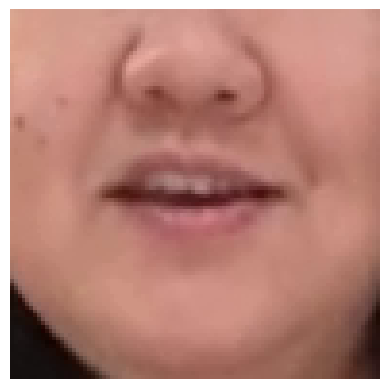

In [40]:
import io, av
import matplotlib.pyplot as plt

def decode_av_bytes(av_bytes, max_frames=5):
    """Dekodiert eine AV-Datei aus Bytes und gibt die ersten Frames zurück."""
    buf = io.BytesIO(av_bytes)
    container = av.open(buf)  # ffmpeg erkennt Container automatisch
    frames = []
    for frame in container.decode(video=0):   # erster Videostream
        frames.append(frame.to_ndarray(format="rgb24"))
        if len(frames) >= max_frames:
            break
    return frames

sample = next(iter(dataset))
frames = decode_av_bytes(sample["video"], max_frames=int(sample["length"]))

plt.imshow(frames[-1])
plt.axis("off")
plt.show()

In [35]:
import base64
from IPython.display import HTML

def display_av_bytes(av_bytes, mime="video/mp4"):
    b64 = base64.b64encode(av_bytes).decode("ascii")
    return HTML(f'<video controls src="data:{mime};base64,{b64}"></video>')

display_av_bytes(sample["video"])